In [9]:
import numpy as np
import os
import matplotlib.pyplot as plt

AI_CELL = 'Cpaaa'
TARGET_CELL = 'ABarpaapp'
RESOLUTION = 0.254
def load_data(embryo):
    """
    input:
        embryo: int, choose embryo from 1-6
    output:
        data_dicts:dict,dict[nuclei stage][name key][pos/radius],containing postion, radius, cell name
        ai_first_appear: int, 'Cpaaa' first appear nuclei stage
        ai_last_appear: int, 'ABarpaapp' first appear nuclei stage
        target_first_appear: int, 'Cpaaa' die nuclei stage
        target_last_appear: int, 'ABarpaapp' die nuclei stage
    """
    pos_a = []
    radius_a =[]
    cell_name_a = []
    data_dicts = []
    ai_list = []
    target_list = []
    nuclei_num = len(os.listdir('./embryo_data/%02d/nuclei' % embryo))
    for i in range (nuclei_num - 1):
        path = './embryo_data/%02d/nuclei/t%03d-nuclei' % (embryo,i + 1)
        pos = []
        radius = []
        cell_name = []
        with open(path) as file:
            for line in file:
                line = line[:len(line)-1]
                vec = line.split(', ')
                if vec[9] == '':
                    continue
                else:
                    id = int(vec[0])
#                     pos.append(np.array(((float(vec[5])*RESOLUTION), (float(vec[6])*RESOLUTION), (float(vec[7])))))
                    pos.append(np.array((float(vec[5]), float(vec[6]), float(vec[7])/RESOLUTION)))
                    radius.append(float(vec[8]) / 2)
                    cell_name.append(vec[9])
        pos_a.append(pos)
        radius_a.append(radius)
        cell_name_a.append(cell_name)
        pos_radius = list(zip(pos, radius))
        data_dict = dict(zip(cell_name, pos_radius))
        data_dicts.append(data_dict)
    
    for i in range(len(cell_name_a)):
        if AI_CELL in cell_name_a[i]:
            ai_list.append(i)
        if TARGET_CELL in cell_name_a[i]:
            target_list.append(i)
    if ai_list != []:
        ai_first_appear = ai_list[0]
        target_first_appear = target_list[0]
        ai_last_appear = ai_list[-1]
        target_last_appear = target_list[-1]
    else:
        ai_first_appear = 0
        target_first_appear = 0
#     np.save('original ai location', pos_a[168:196])
    return data_dicts,ai_first_appear,ai_last_appear,target_first_appear,target_last_appear

In [10]:
#######Single Embryo distance figure######
def Embryo_dis(embryo):
    """
    input:
        embryo: int, choose embryo from 1-6
    output:
        Distance_to_target
    """
    if embryo == 0:
        time_resolution = 1
        shift_point = 25
    else: 
        time_resolution = 1.25
        shift_point = 20
    
    data_dicts,ai_first_appear,ai_last_appear,target_first_appear,target_last_appear = load_data(embryo)
    ####Starting and ending stage, starting point and the end points (x,y,z) of these two cells
    print('AI cell \nappear stage: (%s,%s)' % (ai_first_appear,ai_last_appear))
    print('starting location {} \nending location   {}'.format(data_dicts[ai_first_appear][AI_CELL][0],data_dicts[ai_last_appear][AI_CELL][0]))
    print('\nTARGET cell \nappear stage: (%s,%s)'% (target_first_appear,target_last_appear))
    print('starting location {} \nending location   {}'.format(data_dicts[target_first_appear][TARGET_CELL][0],data_dicts[target_last_appear][TARGET_CELL][0]))
    ####Maximum distance using starting stage of AI cell
    pos = []
    
    for key in data_dicts[target_first_appear].keys():
        pos.append(data_dicts[target_first_appear][key][0])
    distances = []
    for i in range(len(pos)):
        for j in range(len(pos)):
            distances.append(np.linalg.norm(pos[i]-pos[j])) 
    print("\nMaximum distance: %d"%max(distances))
    
    ###Distance to target
    distance_to_target = []
    begin = max(ai_first_appear,target_first_appear)
#     begin = ai_first_appear + 15
    difference = target_first_appear - ai_first_appear
    end = min(ai_last_appear,target_last_appear)
    print(begin,end,difference)
    for i in range(end-begin):
        distance_to_target.append(np.linalg.norm(data_dicts[begin + i][AI_CELL][0]- \
                                        data_dicts[begin + i][TARGET_CELL][0]))        
    ##shifting range
    distance_to_target_mid = (max(distance_to_target) + min(distance_to_target)) / 2
    distance_to_target_mid_index = np.argmin(np.abs(np.array(distance_to_target)-distance_to_target_mid))
    print("average_y_mid: {}\ny_mid_index: {}\nactual_y_mid[y_mid_index]: {}\n".format(distance_to_target_mid, distance_to_target_mid_index,distance_to_target[distance_to_target_mid_index]))
    shift_num = distance_to_target_mid_index - shift_point
    print("shift step: %f"% shift_num)
    
    ###Draw distance figure
    fig = plt.figure(1)
    plt.title("Distance to target cell over time")
    plt.xlabel("Time(s)")
    plt.ylabel("Distance to target cell(um)")
    plt.plot([time_resolution * k for k in range(len(distance_to_target))],distance_to_target)
    plt.show()
    return distance_to_target, shift_num, distance_to_target_mid_index, difference


AI cell 
appear stage: (94,134)
starting location [403.         301.          27.55905512] 
ending location   [390.         308.          27.55905512]

TARGET cell 
appear stage: (99,134)
starting location [329.         322.          31.49606299] 
ending location   [356.         318.          31.49606299]

Maximum distance: 241
99 134 5
average_y_mid: 56.426732204741704
y_mid_index: 15
actual_y_mid[y_mid_index]: 55.249434666791494

shift step: -5.000000


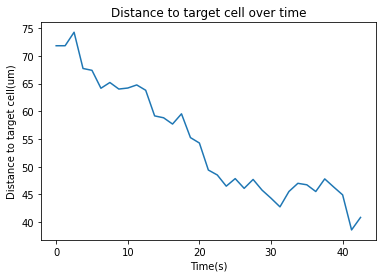

AI cell 
appear stage: (113,152)
starting location [129.         230.          35.43307087] 
ending location   [150.         248.          27.55905512]

TARGET cell 
appear stage: (118,151)
starting location [163.         311.          31.49606299] 
ending location   [158.         287.          31.49606299]

Maximum distance: 217
118 151 5
average_y_mid: 65.57402789321146
y_mid_index: 20
actual_y_mid[y_mid_index]: 65.63916537403612

shift step: 0.000000


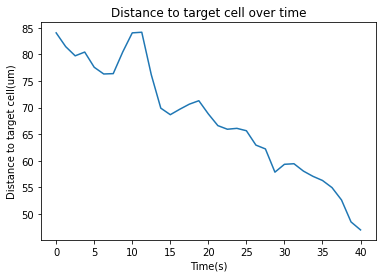

AI cell 
appear stage: (94,133)
starting location [309.         438.          39.37007874] 
ending location   [325.         445.          35.43307087]

TARGET cell 
appear stage: (99,133)
starting location [380.         455.          35.43307087] 
ending location   [364.         447.          35.43307087]

Maximum distance: 249
99 133 5
average_y_mid: 57.43980470315577
y_mid_index: 20
actual_y_mid[y_mid_index]: 59.033888572581766

shift step: 0.000000


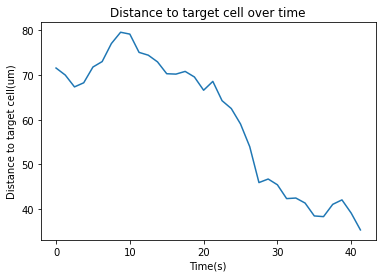

AI cell 
appear stage: (116,154)
starting location [238.         135.          94.48818898] 
ending location   [236.         139.          94.48818898]

TARGET cell 
appear stage: (120,152)
starting location [279.         202.          94.48818898] 
ending location   [271.         176.          94.48818898]

Maximum distance: 248
120 152 4
average_y_mid: 60.977728747747435
y_mid_index: 13
actual_y_mid[y_mid_index]: 61.07372593840988

shift step: -7.000000


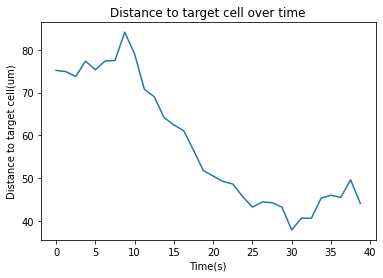

AI cell 
appear stage: (114,152)
starting location [202.         316.          31.49606299] 
ending location   [179.         322.          31.49606299]

TARGET cell 
appear stage: (113,145)
starting location [152.         241.          35.43307087] 
ending location   [145.         271.          31.49606299]

Maximum distance: 236
114 145 -1
average_y_mid: 72.96506496772358
y_mid_index: 17
actual_y_mid[y_mid_index]: 72.52930463612665

shift step: -3.000000


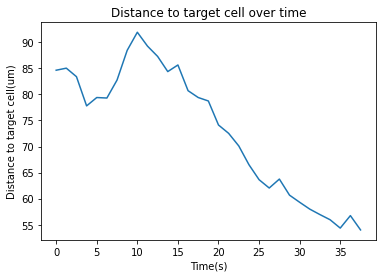

AI cell 
appear stage: (94,133)
starting location [167.         193.          94.48818898] 
ending location   [183.         197.          98.42519685]

TARGET cell 
appear stage: (96,132)
starting location [249.         163.          94.48818898] 
ending location   [225.         188.          98.42519685]

Maximum distance: 216
96 132 2
average_y_mid: 63.11627116856177
y_mid_index: 18
actual_y_mid[y_mid_index]: 63.56886030125127

shift step: -2.000000


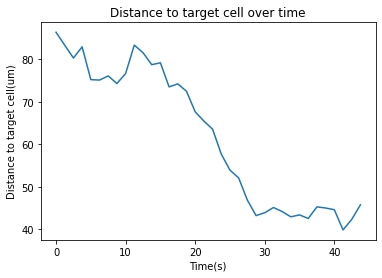

In [11]:
###Calculate each cell's shitfting number and distance to target
time_resolution_2D = 1.25
distances = []
shift_nums = []
distance_to_target_mid_indexs = []
differences = []
for i in range(1,7):
    distance, shift_num, distance_to_target_mid_index, difference = Embryo_dis(i)
    distances.append(distance)
    shift_nums.append(shift_num)
    distance_to_target_mid_indexs.append(distance_to_target_mid_index)
    differences.append(difference)

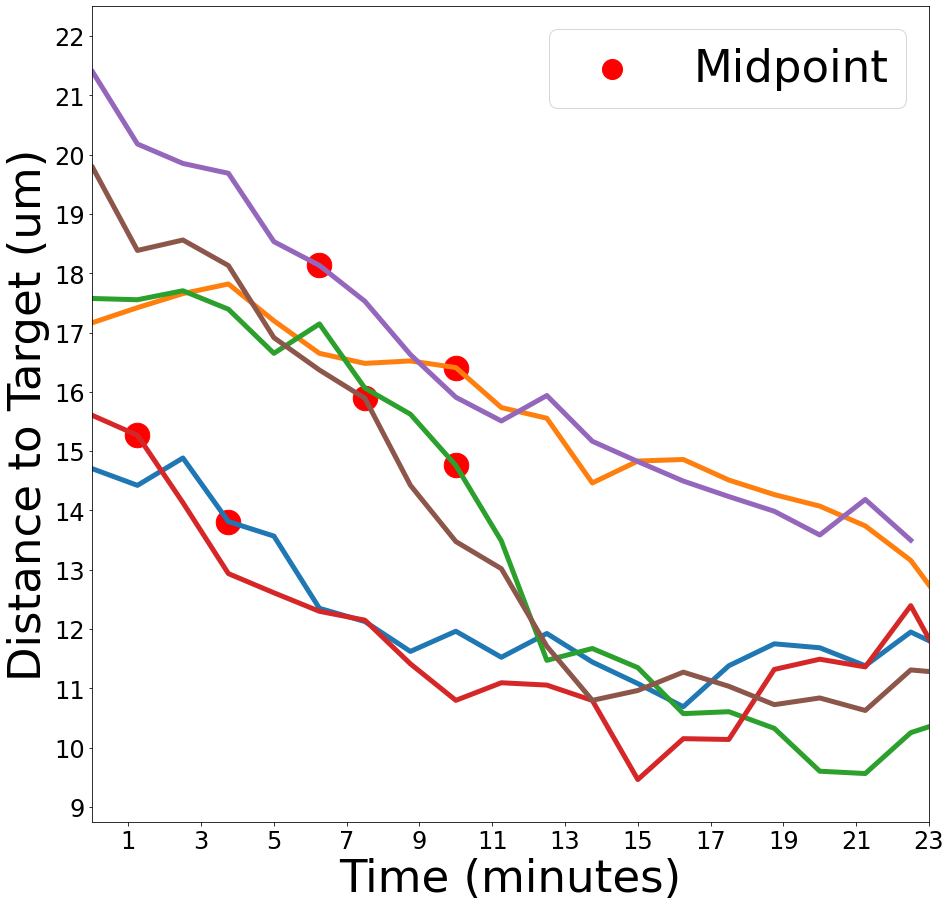

In [17]:
#Plot raw distance to target plot
fig = plt.figure(figsize=(15,15))
for i in range(len(distances)):
    plt.plot([time_resolution_2D * k for k in range(len(distances[i]))],distances[i], linewidth = 5)
for i in range(len(distances)):
    plt.scatter(distance_to_target_mid_indexs[i] * time_resolution_2D,distances[i][distance_to_target_mid_indexs[i]], c = 'r',s = 600)

plt.scatter(distance_to_target_mid_indexs[0] * time_resolution_2D,distances[0][distance_to_target_mid_indexs[0]], c = 'r',s = 400,label = 'Midpoint')
# plt.title("Distance to target cell over time")
plt.xlabel("Time (minutes)", fontsize = 45)
plt.ylabel("Distance to Target (um)",fontsize = 45)
plt.xticks(ticks = np.arange(0,45,2),labels = np.arange(-15,30,2),fontsize=24)
plt.yticks(ticks = np.arange(0,90,4),labels = np.arange(0*0.254,90*0.254,4*0.254).astype(int),fontsize = 24)
# plt.yticks(ticks = np.arange(0,24),labels = np.arange(0/0.254,24/0.254,1/0.254).astype(int),fontsize=24)
plt.xlim(xmin =15, xmax = 38)
plt.ylim(ymin = 35, ymax = 90)
plt.legend(fontsize = 45)
plt.show()

In [13]:
import statistics 
distances_shifted = []
for i in range(len(distances)):
    distances_shifted.append([0 for i in range(abs(shift_nums[i]))] + distances[i])
distances_avg = []
distances_stdev = []
distances_upper = []
distances_lower = []
point_num = min([len(k) for k in distances_shifted])
set_num = len(distances_shifted)
for i in range(point_num):
    temp = []
    for j in range(set_num):
        temp.append(distances_shifted[j][i])
    distances_avg.append(statistics.mean(temp))
    distances_stdev.append(statistics.stdev(temp))
    distances_upper.append(distances_avg[i] + distances_stdev[i])
    distances_lower.append(distances_avg[i] - distances_stdev[i])

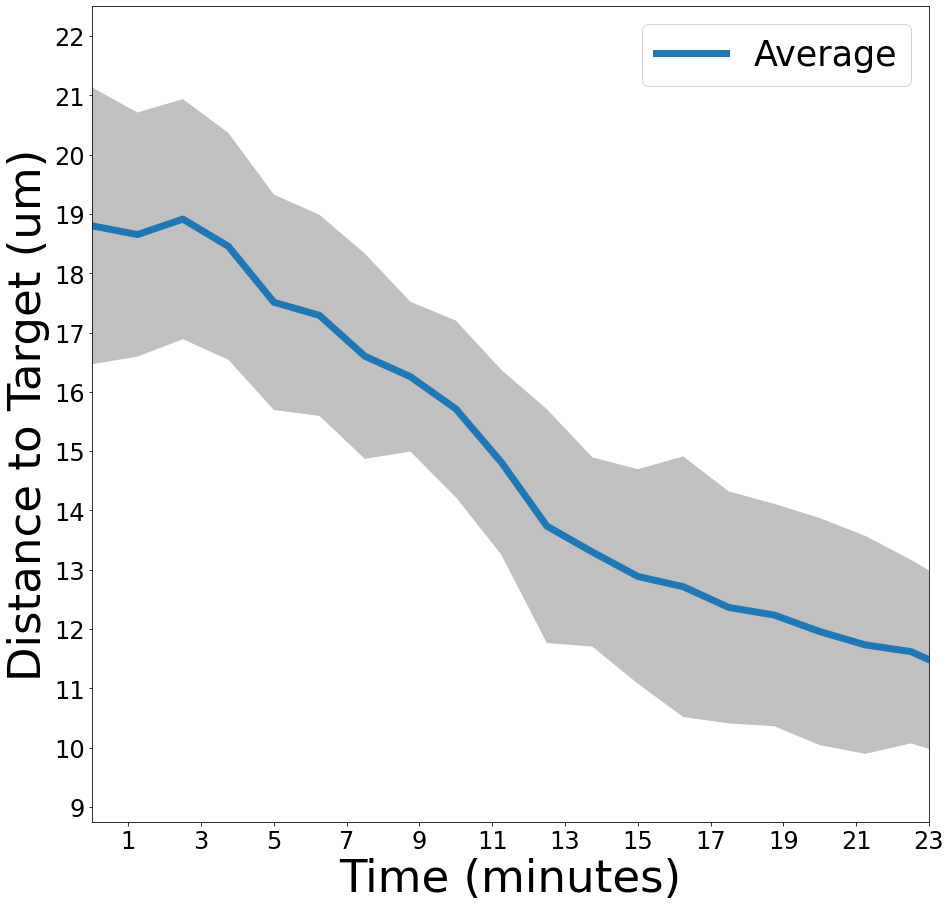

In [18]:
#Plot normalized distance to target plot
fig = plt.figure(figsize=(15,15))
plt.fill_between([time_resolution_2D * k for k in range(len(distances_lower))], \
                 distances_upper, distances_lower, facecolor='silver', interpolate=True)


plt.plot([time_resolution_2D * k for k in range(len(distances_avg))],distances_avg, label = 'Average', linewidth=7)
plt.xticks(ticks = np.arange(0,45,2),labels = np.arange(-15,30,2),fontsize = 24)
plt.yticks(ticks = np.arange(0,90,4),labels = np.arange(0*0.254,90*0.254,4*0.254).astype(int),fontsize = 24)
plt.xlim(xmin =15, xmax = 38)
# plt.ylim(ymin = 8, ymax = 24)
plt.ylim(ymin = 35, ymax = 90)
plt.xlabel('Time (minutes)',fontsize = 45)
plt.ylabel('Distance to Target (um)',fontsize = 45)
plt.legend(loc = 'upper right',fontsize = 35)